In [1]:
from gibbs import *
from data_simu import *
from mcmc_plot import trace_plot, get_trace_list

## 1.Simulate Data

I simulate the data according to 

$$X= WZ + \sigma^2 I_n$$
where 

 1. $\sigma^2$ is a scalar for the noise parameter
 2. $(Z_i)_{qx1} \sim N(0, I_q)$ is the principle component vector for i-th observation
 3. $(\alpha_j)_{}$ is the precision vector parameter for $W$ matrix
 4. $(W_j)_{dx1} \sim N(0, \frac{1}{\alpha^*_j}I_d)$ is the j-th column of $W$ projection matrix

In the following simualation, I chose d = 5, q_star = 1, meaning there is only one important component driving 5 dimensional data $X$

In [17]:
# data dimension
d = 5
# true component dimension
q_star = 1
# sample size
n_sample = 1000
# true sigma2
sigma2_star = 0.2
# true component variance parameter
a_star_list = 1 / np.linspace(1,10,q_star)

In [18]:
X = generate_data(d, q_star, n_sample, sigma2_star, a_star_list)

Text(0.5, 1.0, 'Data Plot')

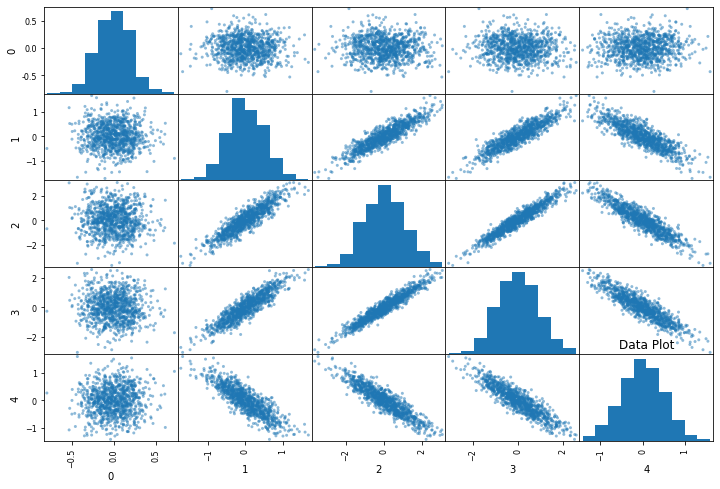

In [19]:
pd.plotting.scatter_matrix(pd.DataFrame(X).T, figsize=(12,8))
plt.title('Data Plot')

## 2. Gibbs Sampling

### 2.1 Prior Parameter Setup


In [20]:
q = d-1
prior_param = dict({'beta_sigma2':2,
      'a_sigma2':10,
      'a_aj': 1 / np.linspace(1,10,q),
      'beta_aj':1 / np.linspace(1,10,q)    
})

### 2.2 Inference Parameter Setup

In [21]:
iterations = 1000
n_chains = 3

### 2.3 Inference Sampling standard

In [22]:
mcmc_list = []
for sub_chains in range(n_chains):    
    init_dict = dict({'Z0':np.random.normal(0,1, [q, n_sample]),
            "sigma20":np.random.gamma(4,1/4),
            "w0":np.random.normal(0, 0.6, [d,q]),
            "alpha0": np.random.uniform(0,1, q)})    
                      
    infer_dict = gibbs_scheme(X, init_dict, iterations, q, prior_param)                      
    mcmc_list.append(infer_dict)

In [23]:
sigma2_list = get_trace_list(mcmc_list, 'sigma2_list')
Z_list = get_trace_list(mcmc_list, 'Z_list')
W_list = get_trace_list(mcmc_list, 'W_list')
alpha_list = get_trace_list(mcmc_list, 'alpha_list')

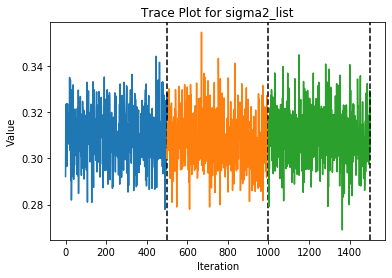

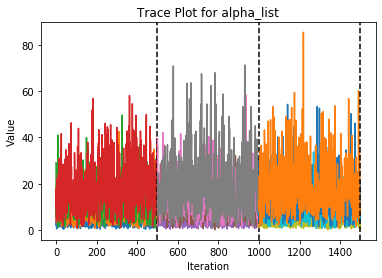

In [24]:
trace_plot(mcmc_list, var_list= ['sigma2_list', 'alpha_list'])

In [25]:
alpha_table = pd.concat([pd.DataFrame(alpha_list[i]) for i in range(n_chains)], axis=0, keys=list(range(n_chains)))

In [26]:
alpha_table.mean()

0     3.331177
1     8.989064
2    13.958994
3    19.206548
dtype: float64

### 2.4 Inference Sampling Approxmiate

In [27]:
mcmc_list = []
for sub_chains in range(n_chains):    
    init_dict = dict({'Z0':np.random.normal(0,1, [q, n_sample]),
            "sigma20":np.random.gamma(4,1/4),
            "w0":np.random.normal(0, 0.6, [d,q]),
            "alpha0": np.random.uniform(0,1, q)})    
                      
    infer_dict = gibbs_scheme(X, init_dict, iterations, q, prior_param, xi =0.6)                      
    mcmc_list.append(infer_dict)

In [28]:
sigma2_list = get_trace_list(mcmc_list, 'sigma2_list')
Z_list = get_trace_list(mcmc_list, 'Z_list')
W_list = get_trace_list(mcmc_list, 'W_list')
alpha_list = get_trace_list(mcmc_list, 'alpha_list')

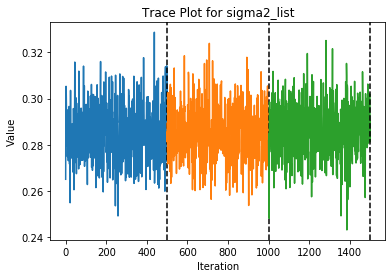

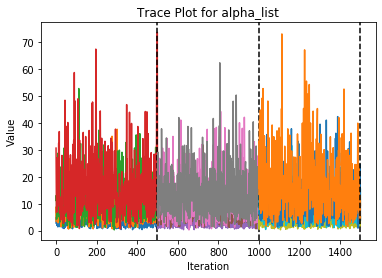

In [29]:
trace_plot(mcmc_list, var_list= ['sigma2_list', 'alpha_list'])

In [30]:
alpha_table = pd.concat([pd.DataFrame(alpha_list[i]) for i in range(n_chains)], axis=0, keys=list(range(n_chains)))

In [31]:
alpha_table.mean()

0     3.249238
1     8.469798
2    12.158889
3    15.635337
dtype: float64